## Task To Do SVM

In [12]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## A) User Purchase

In [16]:
df = pd.read_csv("datasets/User_Data.csv")
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [17]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_Train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.2, random_state=54)
len(X_Train), len (X_hold)

(320, 80)

In [18]:
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)
ohe.fit(X_Train[['Gender']])
X_Train[['Gender']] = ohe.transform(X_Train[['Gender']])
X_hold[['Gender']] = ohe.transform(X_hold[['Gender']])
X_Train.head()

,Gender,Age,EstimatedSalary
333,1,40,65000
273,1,39,106000
307,0,47,113000
4,1,19,76000
292,1,55,39000


In [19]:
ss = StandardScaler()
ss.fit(X_Train[['Gender', 'Age', 'EstimatedSalary']])
X_Train[['Gender', 'Age', 'EstimatedSalary']] = ss.transform(X_Train[['Gender', 'Age', 'EstimatedSalary']])
X_hold[['Gender', 'Age', 'EstimatedSalary']] = ss.transform(X_hold[['Gender', 'Age', 'EstimatedSalary']])
X_Train.head()

,Gender,Age,EstimatedSalary
333,1.006270,0.226798,-0.160423
273,1.006270,0.132176,1.040916
307,-0.993769,0.889155,1.246022
4,1.006270,-1.760273,0.161888
292,1.006270,1.646135,-0.922247


In [20]:
X_hold.head()

,Gender,Age,EstimatedSalary
346,1.006270,1.456890,0.044684
178,1.006270,-1.287161,-1.391062
251,1.006270,-0.057069,-0.541335
228,-0.993769,0.226798,0.044684
179,-0.993769,-0.624804,-1.068751


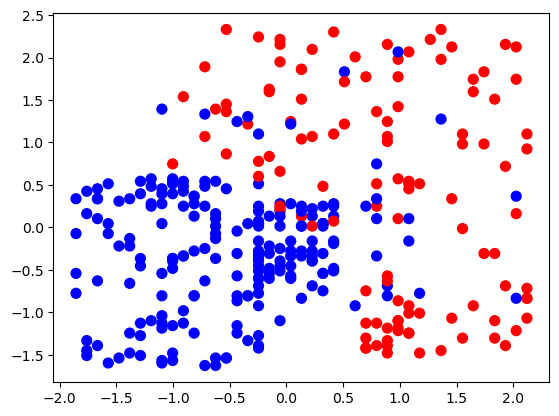

In [26]:
plt.scatter(X_Train['Age'], X_Train['EstimatedSalary'], c=y_train, s=50, cmap='bwr')

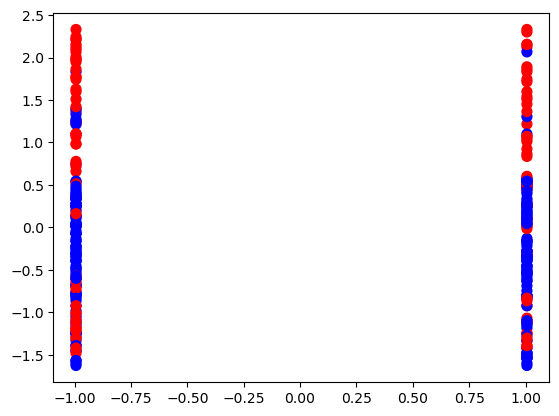

In [27]:
plt.scatter(X_Train['Gender'], X_Train['EstimatedSalary'], c=y_train, s=50, cmap='bwr')

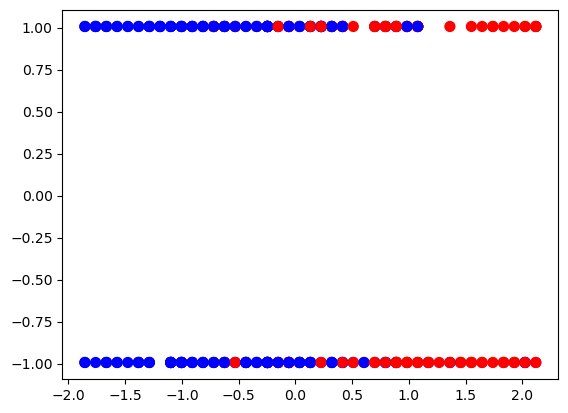

In [28]:
plt.scatter(X_Train['Age'], X_Train['Gender'], c=y_train, s=50, cmap='bwr')

### I) Linear

In [29]:
model = SVC(kernel='linear')
model.fit(X_Train,y_train)
scores_array = cross_val_score(model, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array.mean())

Accuracy:  0.834375


Accuracy:  0.8875
F1-Score :  0.8163265306122449


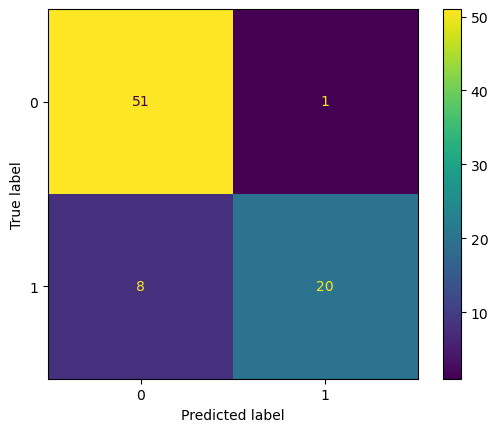

In [30]:
y_predict = model.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
print("F1-Score : ", f1_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)

### II) polynomial

In [40]:
poly = SVC(kernel='poly', degree=5)
poly.fit(X_Train,y_train)
scores_array = cross_val_score(poly, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array.mean())

Accuracy:  0.828125


Accuracy:  0.85
F1-Score :  0.7391304347826088


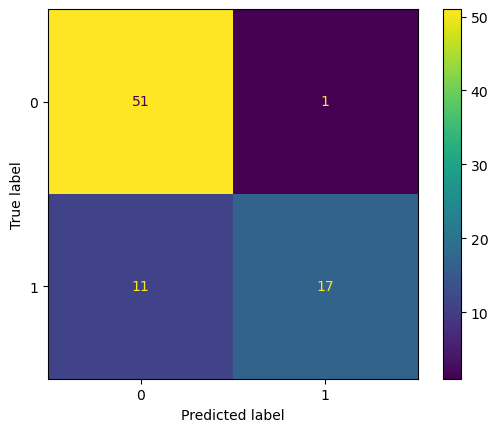

In [41]:
y_predict = poly.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
print("F1-Score : ", f1_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)

### III) RBF

In [52]:
rbf = SVC(kernel='rbf', gamma=10)
rbf.fit(X_Train,y_train)
scores_array = cross_val_score(rbf, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array.mean())

Accuracy:  0.86875


Accuracy:  0.9
F1-Score :  0.8518518518518519


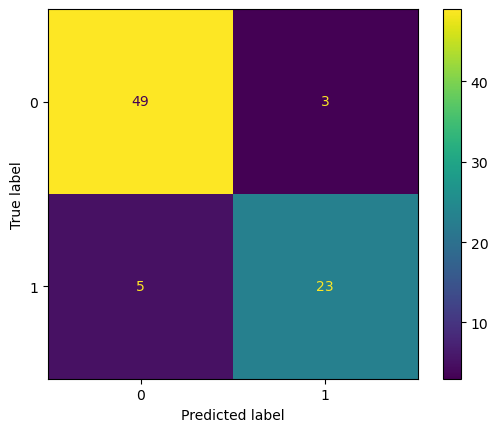

In [53]:
y_predict = rbf.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
print("F1-Score : ", f1_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)

## B) Cancer Genes

   gene1  gene2  cancer
0    4.3    3.9       1
1    2.5    6.3       0
2    5.7    3.9       1
3    6.1    6.2       0
4    7.4    3.4       1


<Axes: xlabel='gene1', ylabel='gene2'>

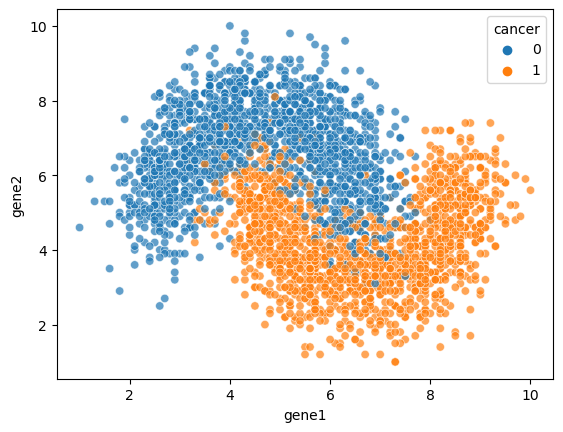

In [61]:
df = pd.read_csv("datasets/gene_expression.csv")
print(df.head())
sns.scatterplot(x='gene1', y='gene2', hue='cancer', data=df, alpha=0.7)

In [62]:
X = df.drop('cancer', axis=1)
y = df['cancer']
X_Train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.2, random_state=54)
len(X_Train), len (X_hold)

(2400, 600)

In [63]:
ss = StandardScaler()
ss.fit(X_Train[['gene1', 'gene2']])
X_Train[['gene1', 'gene2']] = ss.transform(X_Train[['gene1', 'gene2']])
X_hold[['gene1', 'gene2']] = ss.transform(X_hold[['gene1', 'gene2']])
X_Train.head()

,gene1,gene2
954,-1.603854,0.477687
2106,1.195720,-0.099259
346,1.634869,-0.733899
621,-0.286407,0.419993
2308,-0.066833,1.631579


In [64]:
X_hold.head()

,gene1,gene2
248,-1.054918,1.400801
2630,1.689763,0.189214
2933,1.140827,0.304603
1206,-1.878322,0.419993
2083,1.689763,0.073825


### I) linear

In [65]:
linear = SVC(kernel='linear')
linear.fit(X_Train,y_train)
scores_array_l = cross_val_score(linear, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array_l.mean())

Accuracy:  0.8566666666666667


Accuracy:  0.855
F1-Score :  0.8460176991150442


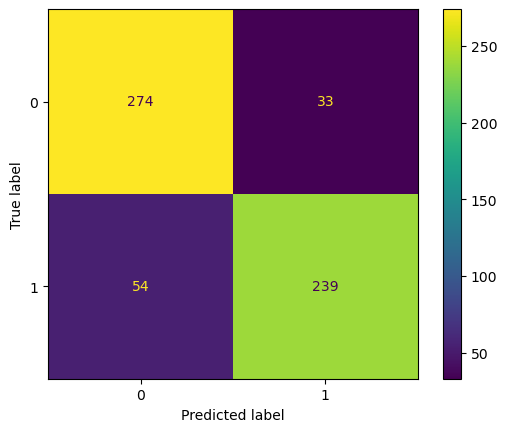

In [66]:
y_predict = linear.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
print("F1-Score : ", f1_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)

### II) Polynomial

In [77]:
poly_gene = SVC(kernel='poly', degree=5)
poly_gene.fit(X_Train,y_train)
scores_array_g = cross_val_score(poly_gene, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array_g.mean())

Accuracy:  0.8550000000000001


Accuracy:  0.8466666666666667
F1-Score :  0.8289962825278812


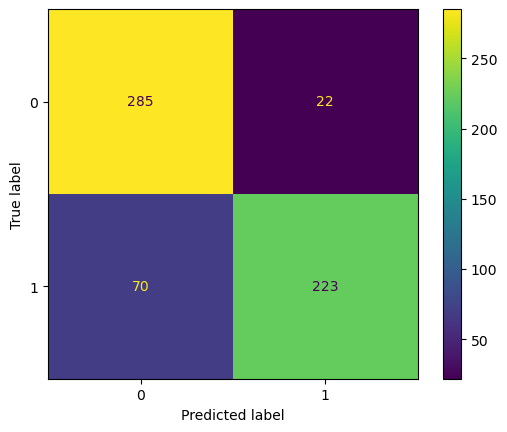

In [78]:
y_predict = poly_gene.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
print("F1-Score : ", f1_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)

### III) RBF

In [92]:
rbf_gene = SVC(kernel='rbf', gamma=8)
rbf_gene.fit(X_Train,y_train)
scores_array_r = cross_val_score(rbf_gene, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array_r.mean())

Accuracy:  0.9354166666666668


Accuracy:  0.9416666666666667
F1-Score :  0.9384885764499121


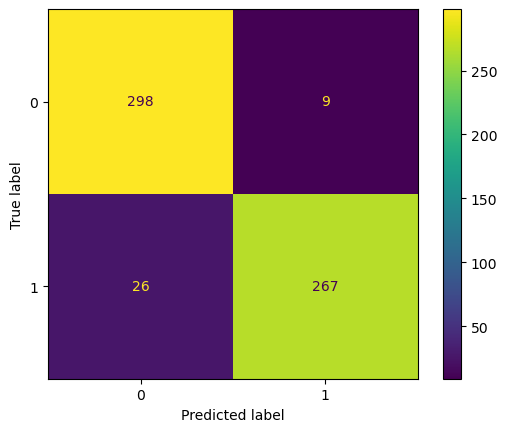

In [93]:
y_predict = rbf_gene.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
print("F1-Score : ", f1_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)

## C) Digit Classification

In [94]:
digits = datasets.load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target']= digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [102]:
df.target.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [95]:
X = df.drop('target', axis=1)
y = df['target']
X_Train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.2, random_state=54)
len(X_Train), len (X_hold)

(1437, 360)

In [96]:
ss = StandardScaler()
ss.fit(X_Train)
X_Train = ss.transform(X_Train)
X_hold = ss.transform(X_hold)
X_Train

array([[ 0.        , -0.33474156, -0.68173364, ..., -1.14298904,
        -0.51088909, -0.1954641 ],
       [ 0.        , -0.33474156, -0.89137439, ...,  0.88496682,
         1.19586394, -0.1954641 ],
       [ 0.        , -0.33474156, -1.10101514, ..., -1.14298904,
        -0.51088909, -0.1954641 ],
       ...,
       [ 0.        , -0.33474156, -0.89137439, ...,  0.88496682,
        -0.26706723, -0.1954641 ],
       [ 0.        , -0.33474156, -0.05281138, ...,  1.22295946,
         0.22057649, -0.1954641 ],
       [ 0.        , -0.33474156,  1.20503314, ..., -1.14298904,
        -0.51088909, -0.1954641 ]])

In [97]:
X_hold

array([[ 0.        , -0.33474156, -0.26245213, ..., -1.14298904,
        -0.51088909, -0.1954641 ],
       [ 0.        , -0.33474156,  0.57611088, ..., -0.46700375,
        -0.51088909, -0.1954641 ],
       [ 0.        ,  1.85671004,  1.62431464, ..., -1.14298904,
        -0.51088909, -0.1954641 ],
       ...,
       [ 0.        , -0.33474156,  0.15682937, ..., -1.14298904,
        -0.51088909, -0.1954641 ],
       [ 0.        , -0.33474156,  0.78575163, ...,  0.7159705 ,
        -0.26706723, -0.1954641 ],
       [ 0.        , -0.33474156, -0.89137439, ...,  0.88496682,
         0.95204207, -0.1954641 ]])

### I) Linear

In [98]:
linear_d = SVC(kernel='linear')
linear_d.fit(X_Train,y_train)
scores_array_dig = cross_val_score(linear_d, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array_dig.mean())

Accuracy:  0.9707776809910957


Accuracy:  0.9861111111111112


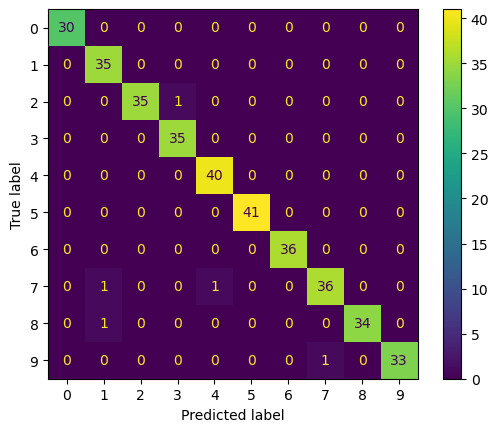

In [103]:
y_predict = linear_d.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)

###  II) Polynomial

In [106]:
poly_digit = SVC(kernel='poly', degree=1)
poly_digit.fit(X_Train,y_train)
scores_array_di = cross_val_score(poly_digit, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array_di.mean())

Accuracy:  0.9763404955478127


Accuracy:  0.9833333333333333


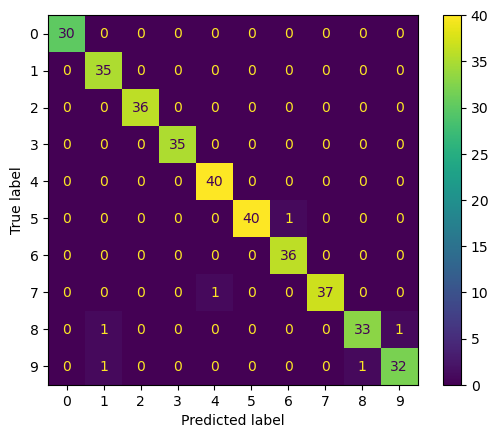

In [107]:
y_predict = poly_digit.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)

### III) RBF

In [120]:
rbf_digit = SVC(kernel='rbf', gamma=1)
rbf_digit.fit(X_Train,y_train)
scores_array_digit = cross_val_score(rbf_digit, X_Train, y_train, cv=5, scoring='accuracy')
print("Accuracy: ", scores_array_digit.mean())

Accuracy:  0.12248354626403406


Accuracy:  0.1388888888888889


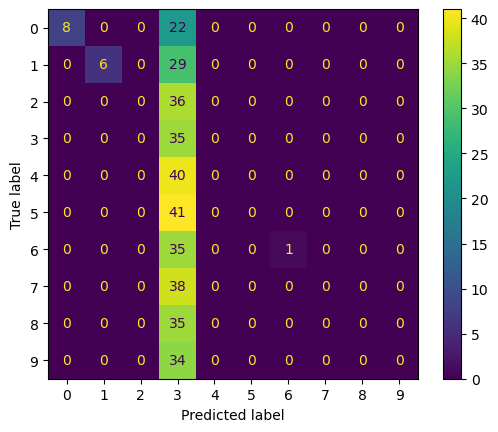

In [121]:
y_predict = rbf_digit.predict(X_hold)
print("Accuracy: ", accuracy_score(y_hold, y_predict))
ConfusionMatrixDisplay.from_predictions(y_hold, y_predict)